In [1]:
import os
import argparse
import cv2 as cv
import time
#from picamera import PiCamera

from utilities import *

In [16]:
def detect_bottle(img):
    t_start_det = time.time()
    hsv_min = np.array([0, 26, 116])
    hsv_max = np.array([178, 54, 166])
    brick_mask = HSV_brick_mask(img, hsv_min, hsv_max)
    
    
    """"""
    ### IMPORTANT
    beacon_hsv_min = np.array([0, 0, 200])
    beacon_hsv_max = np.array([180, 255, 255])
    beacon_mask = HSV_brick_mask(img, beacon_hsv_min, beacon_hsv_max)
    plt.imshow(beacon_mask)
    plt.show()
    ###
    
    
    
    rectangles = find_rectangles_around_brick(brick_mask)
    img_out = img.copy()
    for rect in rectangles:
        #print(rect)
        x1, x2, y1, y2 = rect
        cv.rectangle(img_out, (x2, x1), (y2, y1), (255, 0, 0), 3)
    
    ROI = img[250:, 0:]
    #print(np.shape(ROI))
    img_gray = cv.cvtColor(ROI, cv.COLOR_BGR2GRAY)
    foundCorner, corners = corner_detection(img_gray)
    #print("corners", corners)

    
        
    # Try to exclude outliers
    cornerList = []
    for i in range(len(corners)):
        c = corners[i].flatten()
        
        isBrick = False
        """"""
        isBeacon = False
        """"""
        for rect in rectangles:
            if corner_in_rectangle(rect, c):
                isBrick = True  # corner lies inside a rectangle describing a brick
                break
        
        ### IMPORTANT
        if corner_in_beacon(beacon_mask, c):
            isBeacon = True
        ###
        #print("isBeacon:", isBeacon)
        
        if not isBrick and not isBeacon:
            min_neighbours = 6  # minimum amount of neighbours
            max_distance = 100  # distance in pixels within the corner must have its neighbours
            isOutlier = corner_is_outlier(corners, i, min_neighbours, max_distance)
            
        """"""
        if not isBrick and not isBeacon and not isOutlier:
            
            cornerList.append(c)

    # TODO add the case where there are more than 1 bottle in the image!

    # Plot a bounding box around the bottle
    has_bottle, center, img_out = add_corners(img_out, cornerList)

    if (has_bottle):
        print("[DETECTION] Found a bottle at position ", center)
    else:
        print("[DETECTION] Found no bottle ...")

    t_stop_det = time.time()
    print("[DETECTION] detection time: ", t_stop_det - t_start_det, "seconds")
    return has_bottle, center, img_out


images/noIR/image11.jpg


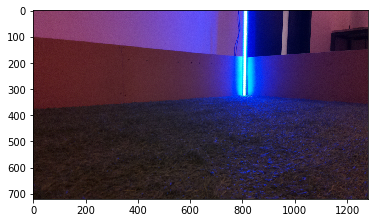

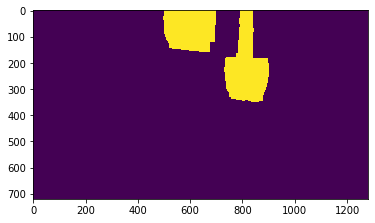

neighbour 3
neighbour 2
neighbour 1
neighbour 2
[DETECTION] Found no bottle ...
[DETECTION] detection time:  0.22890305519104004 seconds


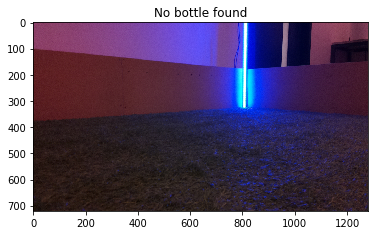

In [17]:
i = 1
while i < 2:
    img_name = "images/noIR/image11.jpg"
    print(img_name)
    plt.imshow(plt.imread(img_name))
    plt.show()
    img = cv.imread(img_name)
    #plt.imshow(img)
    #plt.show()
    has_bottle, center, img_out = detect_bottle(img)

    img_out = cv.cvtColor(img_out, cv.COLOR_BGR2RGB)

    plt.figure()
    if has_bottle:
        plt.title("Found bottle")
    else:
        plt.title("No bottle found")
    plt.imshow(img_out)
    plt.show()
    i += 1


images/noIR/image1.jpg


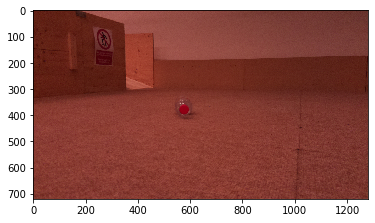

neighbour 4
neighbour 4
neighbour 4
neighbour 4
neighbour 4
neighbour 0
neighbour 0
[DETECTION] Found no bottle ...
[DETECTION] detection time:  0.025709152221679688 seconds


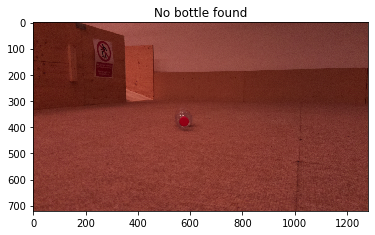

images/noIR/image2.jpg


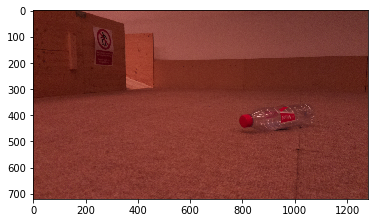

neighbour 3
neighbour 3
neighbour 4
neighbour 5
neighbour 5
neighbour 6
neighbour 5
neighbour 3
neighbour 5
neighbour 5
[DETECTION] Found a bottle at position  [943 426]
[DETECTION] detection time:  0.03649091720581055 seconds


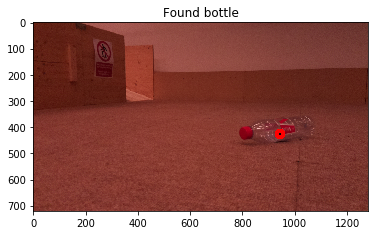

images/noIR/image3.jpg


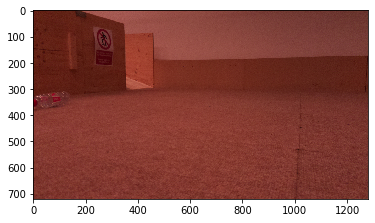

neighbour 6
neighbour 7
neighbour 7
neighbour 7
neighbour 6
neighbour 7
neighbour 7
neighbour 7
neighbour 0
neighbour 0
[DETECTION] Found a bottle at position  [ 62 340]
[DETECTION] detection time:  0.028699874877929688 seconds


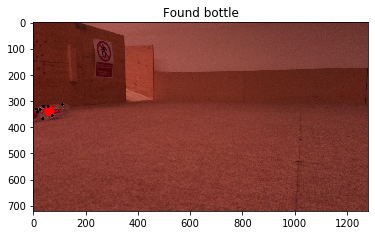

images/noIR/image4.jpg


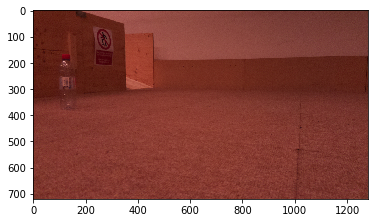

neighbour 7
neighbour 7
neighbour 7
neighbour 6
neighbour 0
neighbour 7
neighbour 7
neighbour 0
neighbour 6
neighbour 7
[DETECTION] Found a bottle at position  [119 306]
[DETECTION] detection time:  0.029372215270996094 seconds


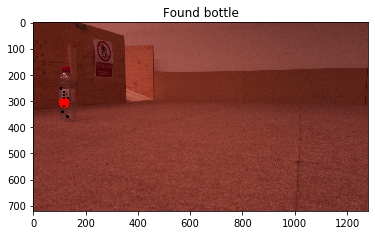

images/noIR/image5.jpg


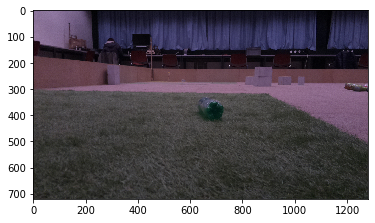

neighbour 3
neighbour 3
neighbour 3
neighbour 3
neighbour 3
neighbour 3
neighbour 3
neighbour 3
neighbour 0
neighbour 0
[DETECTION] Found no bottle ...
[DETECTION] detection time:  0.024880170822143555 seconds


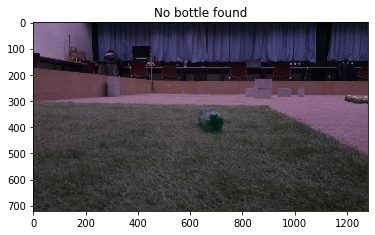

images/noIR/image6.jpg


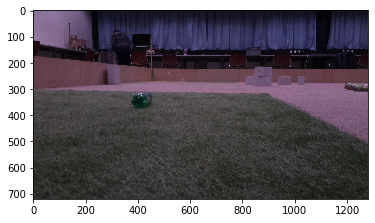

neighbour 4
neighbour 3
neighbour 3
neighbour 4
neighbour 4
neighbour 3
neighbour 4
neighbour 4
neighbour 0
neighbour 3
[DETECTION] Found no bottle ...
[DETECTION] detection time:  0.028172016143798828 seconds


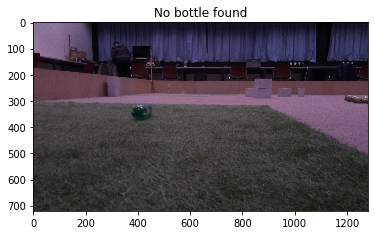

images/noIR/image7.jpg


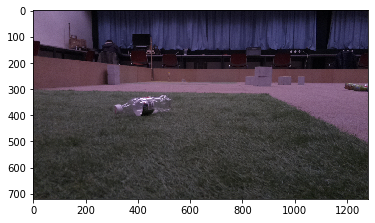

neighbour 7
neighbour 7
neighbour 0
neighbour 8
neighbour 6
neighbour 7
neighbour 5
neighbour 8
neighbour 8
neighbour 8
[DETECTION] Found a bottle at position  [440 363]
[DETECTION] detection time:  0.034501075744628906 seconds


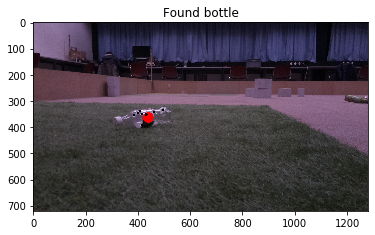

images/noIR/image8.jpg


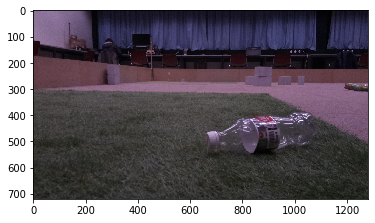

neighbour 7
neighbour 7
neighbour 7
neighbour 7
neighbour 7
neighbour 7
neighbour 1
neighbour 7
neighbour 7
neighbour 1
[DETECTION] Found a bottle at position  [1011  412]
[DETECTION] detection time:  0.02568984031677246 seconds


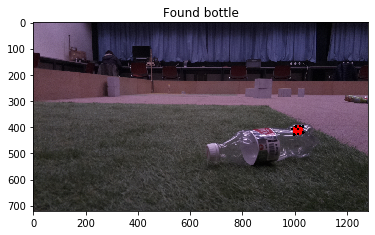

images/noIR/image9.jpg


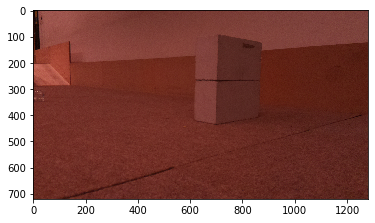

neighbour 4
neighbour 4
neighbour 4
neighbour 4
neighbour 4
neighbour 0
neighbour 0
[DETECTION] Found no bottle ...
[DETECTION] detection time:  0.0284121036529541 seconds


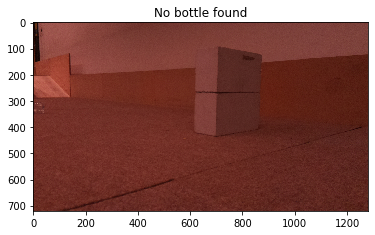

images/noIR/image10.jpg


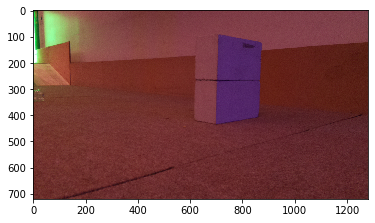

neighbour 6
neighbour 6
neighbour 6
neighbour 6
neighbour 6
neighbour 5
neighbour 1
neighbour 1
neighbour 6
neighbour 1
[DETECTION] Found a bottle at position  [ 59 319]
[DETECTION] detection time:  0.03907299041748047 seconds


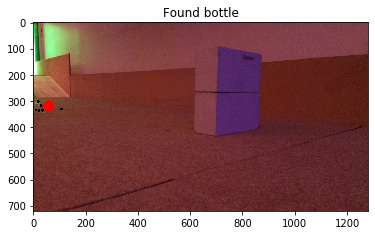

images/noIR/image11.jpg


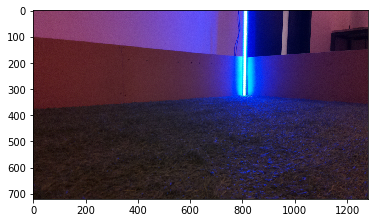

neighbour 3
neighbour 2
neighbour 1
neighbour 2
[DETECTION] Found no bottle ...
[DETECTION] detection time:  0.04285907745361328 seconds


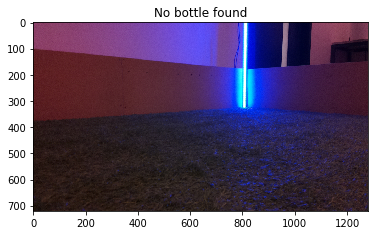

images/noIR/image12.jpg


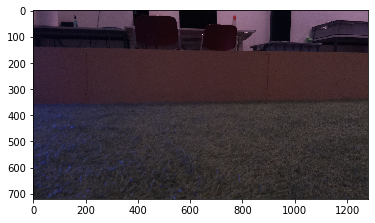

neighbour 1
neighbour 3
neighbour 4
neighbour 3
neighbour 4
neighbour 1
neighbour 3
neighbour 2
neighbour 0
neighbour 5
[DETECTION] Found no bottle ...
[DETECTION] detection time:  0.03119492530822754 seconds


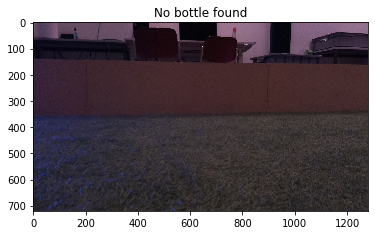

images/noIR/image13.jpg


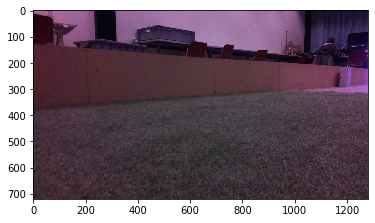

neighbour 2
neighbour 4
neighbour 0
neighbour 2
neighbour 2
neighbour 4
neighbour 2
neighbour 5
neighbour 4
neighbour 1
[DETECTION] Found no bottle ...
[DETECTION] detection time:  0.04042410850524902 seconds


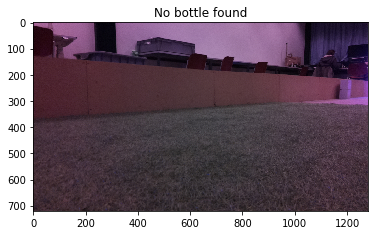

images/noIR/image14.jpg


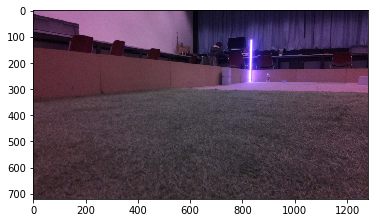

neighbour 0
neighbour 0
neighbour 3
neighbour 3
neighbour 1
neighbour 0
neighbour 2
neighbour 0
neighbour 1
[DETECTION] Found no bottle ...
[DETECTION] detection time:  0.04792189598083496 seconds


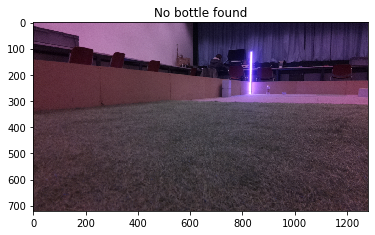

images/noIR/image15.jpg


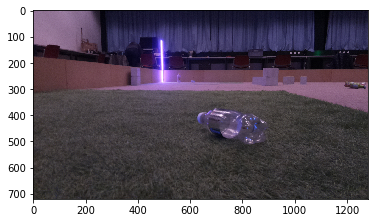

neighbour 8
neighbour 5
neighbour 8
neighbour 0
neighbour 6
neighbour 7
neighbour 8
neighbour 6
neighbour 8
neighbour 6
[DETECTION] Found a bottle at position  [829 452]
[DETECTION] detection time:  0.039298057556152344 seconds


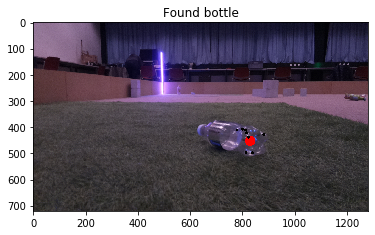

images/noIR/image16.jpg


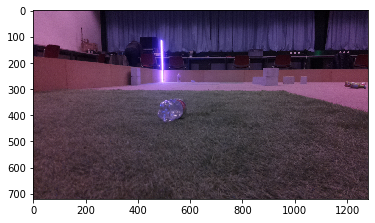

neighbour 1
neighbour 7
neighbour 7
neighbour 7
neighbour 7
neighbour 7
neighbour 7
neighbour 7
neighbour 7
neighbour 1
[DETECTION] Found a bottle at position  [520 386]
[DETECTION] detection time:  0.05389285087585449 seconds


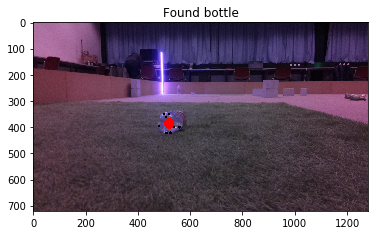

images/noIR/image17.jpg


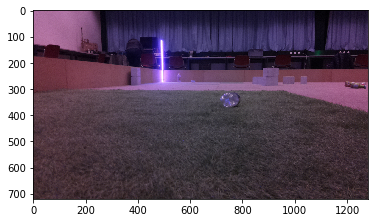

neighbour 5
neighbour 1
neighbour 5
neighbour 5
neighbour 5
neighbour 5
neighbour 5
neighbour 1
neighbour 0
neighbour 0
[DETECTION] Found no bottle ...
[DETECTION] detection time:  0.05281996726989746 seconds


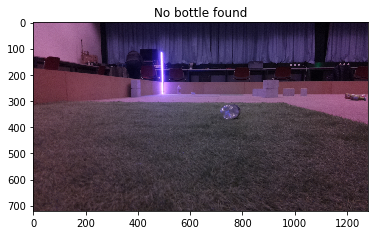

images/noIR/image18.jpg


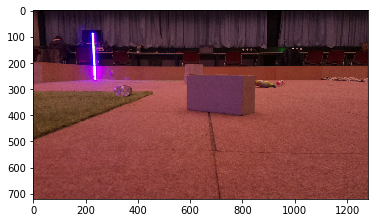

neighbour 2
neighbour 2
neighbour 3
neighbour 2
neighbour 2
neighbour 1
neighbour 1
neighbour 2
[DETECTION] Found no bottle ...
[DETECTION] detection time:  0.05135011672973633 seconds


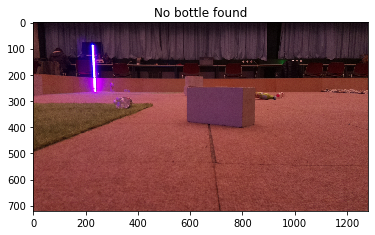

images/noIR/image19.jpg


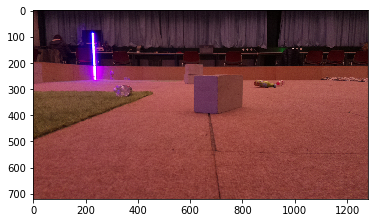

neighbour 2
neighbour 3
neighbour 2
neighbour 1
neighbour 2
neighbour 2
neighbour 2
neighbour 1
[DETECTION] Found no bottle ...
[DETECTION] detection time:  0.03708076477050781 seconds


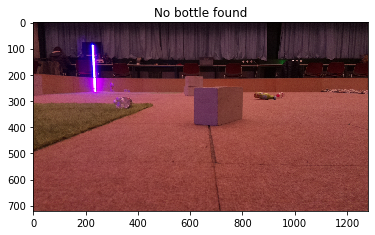

images/noIR/image20.jpg


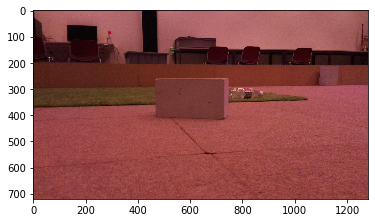

neighbour 9
neighbour 9
neighbour 7
neighbour 9
neighbour 8
neighbour 9
neighbour 9
neighbour 8
neighbour 9
neighbour 9
[DETECTION] Found a bottle at position  [810 318]
[DETECTION] detection time:  0.04483389854431152 seconds


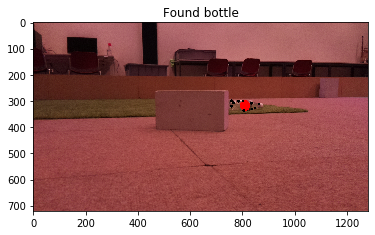

images/noIR/image21.jpg


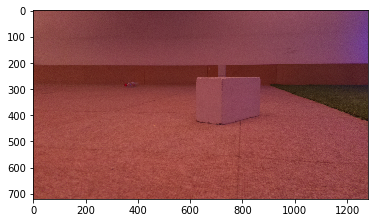

neighbour 1
neighbour 1
neighbour 2
neighbour 1
neighbour 0
neighbour 0
neighbour 0
neighbour 0
neighbour 0
neighbour 1
[DETECTION] Found no bottle ...
[DETECTION] detection time:  0.02745676040649414 seconds


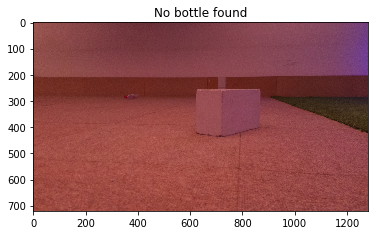

In [4]:
i = 1
while i < 22:
    img_name = "images/noIR/image"+str(i)+".jpg"
    print(img_name)
    plt.imshow(plt.imread(img_name))
    plt.show()
    img = cv.imread(img_name)
    #plt.imshow(img)
    #plt.show()
    has_bottle, center, img_out = detect_bottle(img)

    img_out = cv.cvtColor(img_out, cv.COLOR_BGR2RGB)

    plt.figure()
    if has_bottle:
        plt.title("Found bottle")
    else:
        plt.title("No bottle found")
    plt.imshow(img_out)
    plt.show()
    i += 1